# iris prediction with lightGBM

https://shiokoji11235.com/two_interface_of_lightgbm

In [16]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [35]:
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [37]:
X = cancer.data # Numpy array
y = cancer.target # Numpy array
feature_names = cancer.feature_names.tolist()

X_train, X_validation, y_train, y_validation  = \
    train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape, y_train.shape)

(398, 30) (398,)


## Training API

In [44]:
train_data = lgb.Dataset(
    data=X_train, 
    label=y_train, 
    feature_name=feature_names
)

validation_data = lgb.Dataset(
    data=X_validation, 
    label=y_validation, 
    feature_name=feature_names
)

print(train_data.data)
print(train_data.label)

[[1.149e+01 1.459e+01 7.399e+01 ... 7.431e-02 2.941e-01 9.180e-02]
 [1.049e+01 1.861e+01 6.686e+01 ... 6.528e-02 2.213e-01 7.842e-02]
 [1.225e+01 1.794e+01 7.827e+01 ... 8.211e-02 3.113e-01 8.132e-02]
 ...
 [9.436e+00 1.832e+01 5.982e+01 ... 5.052e-02 2.454e-01 8.136e-02]
 [9.720e+00 1.822e+01 6.073e+01 ... 0.000e+00 1.909e-01 6.559e-02]
 [1.151e+01 2.393e+01 7.452e+01 ... 9.653e-02 2.112e-01 8.732e-02]]
[1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1
 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1
 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0
 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1
 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 

In [45]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 64,
    'min_data_in_leaf': 20,
    'max_depth': 7,
    'verbose': 0,
}

In [46]:
bst = lgb.train(
    params=params, 
    train_set=train_data, 
    num_boost_round=100, 
    early_stopping_rounds=20,
    valid_sets=[validation_data]
)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000323 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_logloss: 0.586823
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_logloss: 0.526709
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_logloss: 0.477581
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_logloss: 0.436374
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_logloss: 0.399281
[LightGBM] [Warning] No further splits with 

/home/mizo/src/miniconda/envs/titanic/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


In [49]:
y_pred = bst.predict(X_validation, num_iteration=bst.best_iteration)
y_pred = y_pred.round(0)

In [55]:
accuracy = accuracy_score(y_pred, y_validation)
print(f"accuracy score: {accuracy:0.4f}")

accuracy score: 0.9825


<AxesSubplot:>

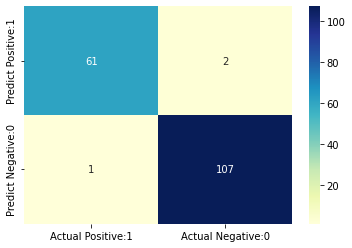

In [57]:
cm = confusion_matrix(y_validation, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Scikit-learn API

In [58]:
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.DataFrame(cancer.target, columns=['diagnosis'])

X_train, X_validation, y_train, y_validation  = \
    train_test_split(X, y, test_size = 0.3, random_state = 0)

In [59]:
clf = lgb.LGBMClassifier(
    objective='binary',
    num_leaves=64,
    min_child_samples=20,
    max_depth=7
)
clf.fit(X_train, y_train)

/home/mizo/src/miniconda/envs/titanic/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mizo/src/miniconda/envs/titanic/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(max_depth=7, num_leaves=64, objective='binary')

In [60]:
y_pred = clf.predict(X_validation)

In [61]:
accuracy = accuracy_score(y_pred, y_validation)
print(f"accuracy score: {accuracy:0.4f}")

accuracy score: 0.9825
